In [1]:
!pwd

/aiffel/aiffel


In [3]:
import pandas as pd
import seaborn as sns

In [48]:
data_taxi = pd.read_csv('/aiffel/data/trip.csv')

In [49]:
data_taxi

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [50]:
data_taxi.tail()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00
22700,Benjamin Miller,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,Cash,1,2.10,11.0,2.35,0.00


In [51]:
data_taxi.info()
# 오브젝트 4 int 1 float 4 9개 컬럼, datetime으로 바꿔야함
# 20000개 이상 데이터 fare_amount 결측치 3개있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [30]:
data_taxi.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [52]:
# 결측치 처리
print(data_taxi.isna().sum())
print(data_taxi.isna().mean())

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64
passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64


In [53]:
data_taxi[data_taxi['fare_amount'].isna()] # 3개니까 그냥 지우자.

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [54]:
data_taxi = data_taxi.dropna()

In [55]:
data_taxi

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [56]:
data_taxi.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


<AxesSubplot:ylabel='passenger_count'>

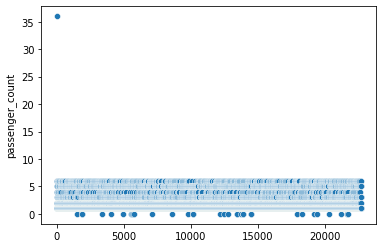

In [57]:
# 이상치 판단
sns.scatterplot(x=data_taxi.index, y=data_taxi['passenger_count'])
# 36 태울 수가 없음. 삭제

In [58]:
# passenger_count 36 삭제
data_taxi_1 = data_taxi[~(data_taxi['passenger_count']>10)]
print(len(data_taxi_1[data_taxi_1['passenger_count']==0])) # psssenger_count 0, 33개 삭제
data_taxi_2 = data_taxi_1[data_taxi_1['passenger_count'] > 0]
data_taxi_2

33


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<AxesSubplot:ylabel='trip_distance'>

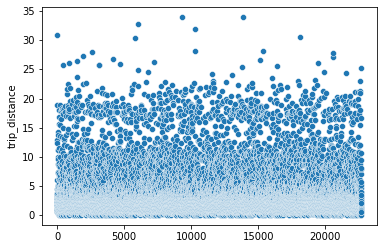

In [59]:
sns.scatterplot(x=data_taxi_2.index, y=data_taxi_2['trip_distance']) # 이상치 판단 불가. 0인거 조사.

In [70]:
len(data_taxi_2[data_taxi_2['trip_distance'] == 0]) / len(data_taxi_2) #0.06% 삭제
data_taxi_3 = data_taxi_2[data_taxi_2['trip_distance'] != 0]

<AxesSubplot:ylabel='fare_amount'>

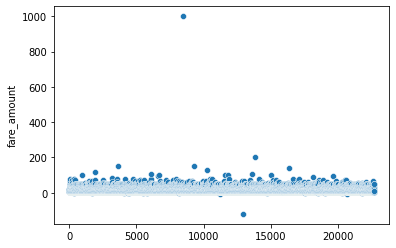

In [71]:
sns.scatterplot(x=data_taxi_3.index, y=data_taxi_3['fare_amount'])
# 요금이 0, 400이상, 음수값 이상치로 보임.

In [74]:
data_taxi_3['fare_amount'].sort_values()

12946   -120.00
20700     -4.50
11206     -4.50
14716     -4.00
17604     -4.00
          ...  
16381    140.00
9282     150.00
3584     152.00
13863    200.01
8478     999.99
Name: fare_amount, Length: 22517, dtype: float64

In [84]:
data_taxi_3[data_taxi_3['fare_amount'] <= 0] # fare_amount 0이하 삭제
data_taxi_4 = data_taxi_3[data_taxi_3['fare_amount'] > 0]
data_taxi_4[data_taxi_4['fare_amount'] > 300] # 999삭제
data_taxi_5 = data_taxi_4[data_taxi_4['fare_amount'] < 999]

<AxesSubplot:ylabel='tip_amount'>

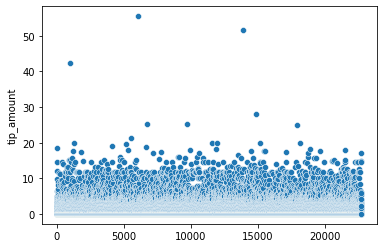

In [97]:
sns.scatterplot(x=data_taxi_5.index, y=data_taxi_5['tip_amount'])
# 팁 30이상 확인필요

In [108]:
data_taxi_5['tip_amount'].sort_values() 

16784     0.0
7232      0.0
7233      0.0
17745     0.0
7235      0.0
         ... 
9716     25.2
14827    28.0
13863    30.0
986      30.0
6066     30.0
Name: tip_amount, Length: 22500, dtype: float64

In [107]:
data_taxi_5[data_taxi_5['tip_amount']>30] # 있을 수도 있으니까 30으로 제한
data_taxi_5['tip_amount'] = data_taxi_5['tip_amount'].apply(lambda x: 30 if x >= 30 else x)

/tmp/ipykernel_32/2841953879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_taxi_5['tip_amount'] = data_taxi_5['tip_amount'].apply(lambda x: 30 if x >= 30 else x)


In [ ]:
data_taxi_4[data_taxi_4['tip_amount']<]

<AxesSubplot:ylabel='tolls_amount'>

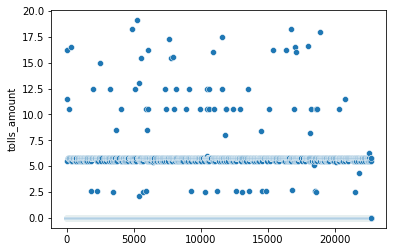

In [109]:
sns.scatterplot(x=data_taxi_5.index, y=data_taxi_5['tolls_amount']) #이상치 확인 힘듦. 5.0에 많음.

In [110]:
from datetime import datetime

In [111]:
data_taxi_5

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [114]:
data_taxi_5['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data_taxi_5['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

/tmp/ipykernel_32/970775031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_taxi_5['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
/tmp/ipykernel_32/970775031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_taxi_5['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


In [116]:
data_taxi_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22500 non-null  object        
 1   tpep_pickup_datetime   22500 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22500 non-null  datetime64[ns]
 3   payment_method         22500 non-null  object        
 4   passenger_count        22500 non-null  int64         
 5   trip_distance          22500 non-null  float64       
 6   fare_amount            22500 non-null  float64       
 7   tip_amount             22500 non-null  float64       
 8   tolls_amount           22500 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 2.2+ MB


In [117]:
data_taxi_5

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00


In [118]:
data_taxi_5['driving time'] = data_taxi_5['tpep_dropoff_datetime'] - data_taxi_5['tpep_pickup_datetime']

/tmp/ipykernel_32/1064357320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_taxi_5['driving time'] = data_taxi_5['tpep_dropoff_datetime'] - data_taxi_5['tpep_pickup_datetime']


In [126]:
data_taxi_5['driving time'].dt.total_seconds()

0         844.0
1        1590.0
2         432.0
3        1815.0
4        1003.0
          ...  
22696     196.0
22697    2448.0
22698     248.0
22699     716.0
22700     800.0
Name: driving time, Length: 22500, dtype: float64

<AxesSubplot:xlabel='driving time', ylabel='fare_amount'>

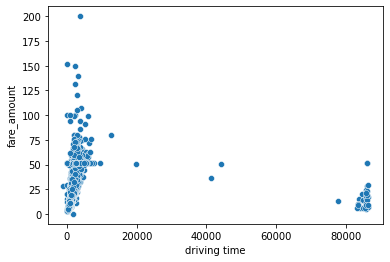

In [173]:
sns.scatterplot(x=data_taxi_5['driving time'].dt.total_seconds(), y=data_taxi_5['fare_amount'])

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

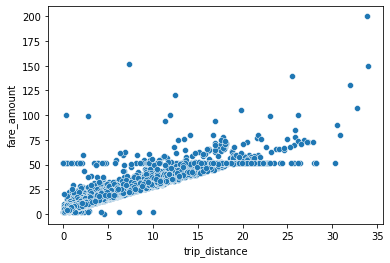

In [129]:
sns.scatterplot(x=data_taxi_5['trip_distance'], y=data_taxi_5['fare_amount'])

<AxesSubplot:ylabel='driving time'>

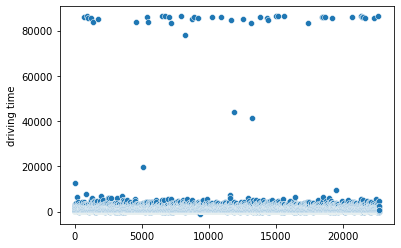

In [133]:
sns.scatterplot(x=data_taxi_5.index, y=data_taxi_5['driving time'].dt.dt.total_minutes())
# 주행시간이 2그룹으로 나눠져 보인다.

In [142]:
data_taxi_5[data_taxi_5['driving time'].dt.total_seconds()<20000]['driving time'].dt.total_seconds()

0         844.0
1        1590.0
2         432.0
3        1815.0
4        1003.0
          ...  
22696     196.0
22697    2448.0
22698     248.0
22699     716.0
22700     800.0
Name: driving time, Length: 22457, dtype: float64

<AxesSubplot:xlabel='driving time', ylabel='fare_amount'>

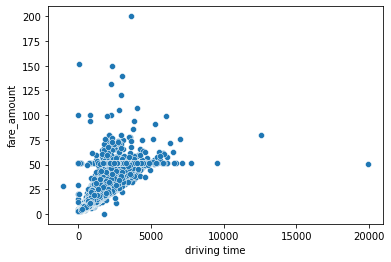

In [143]:
sns.scatterplot(x=data_taxi_5[data_taxi_5['driving time'].dt.total_seconds()<20000]['driving time'].dt.total_seconds(), y=data_taxi_5[data_taxi_5['driving time'].dt.total_seconds()<20000]['fare_amount'])

<AxesSubplot:xlabel='driving time', ylabel='fare_amount'>

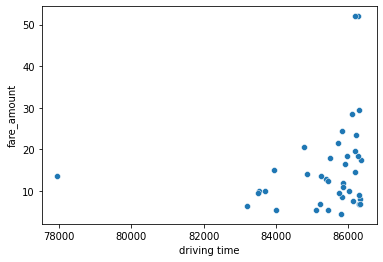

In [174]:
sns.scatterplot(x=data_taxi_5[data_taxi_5['driving time'].dt.total_seconds()>60000]['driving time'].dt.total_seconds(), y=data_taxi_5[data_taxi_5['driving time'].dt.total_seconds()>60000]['fare_amount'])

In [161]:
# Card로 통일
data_taxi_5['payment_method'].str.split(expand=True)

,0,1
0,Debit,Card
1,Debit,Card
2,Debit,Card
3,Cash,None
4,Debit,Card
...,...,...
22696,Cash,None
22697,Cash,None
22698,Debit,Card
22699,Debit,Card


In [163]:
data_taxi_5['payment_method'] = data_taxi_5['payment_method'].replace({'Debit Card':'Card','Credit Card':'Card'})

/tmp/ipykernel_32/395335825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_taxi_5['payment_method'] = data_taxi_5['payment_method'].replace({'Debit Card':'Card','Credit Card':'Card'})


In [165]:
data_taxi_5

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56


In [ ]:
sns.scatterplot(x=data_taxi_5['driving time'].dt.total_seconds(), y=data_taxi_5['fare_amount'])